In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import xgboost
import matplotlib.pyplot as plt
import seaborn as sns
#EDA
from collections import Counter

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from sklearn.ensemble import StackingClassifier

In [124]:
data = pd.read_csv("../../../data/chemical_risk/grpr/grpr_chemical_risk_ready_for_model.csv")

In [125]:
data

,GR/PR,Age at seizure onset,Age (yrs),Duration of seizures (mth),Frequency of seizures,Number of seizures,No. of seizures in previous months,M,N,Y,...,Lack of Sleep+Any Other,Lack of Sleep+Emotional Factor,Lack of Sleep+Emotional Factor+Physical Illness,Lack of Sleep+Physical Illness+Any Other,None,Omission of Anticonvulsant,Omission of Anticonvulsant+Any Other,Omission of Anticonvulsant+Lack of Sleep,Physical Illness,Physical Illness+Any Other
0,1,0.194149,2.110442,1.195742,-0.663021,0.100136,0.040219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.085220,-0.629263,-0.913698,-0.663021,0.100136,0.040219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,-1.439788,-0.418516,1.341220,-0.684983,-0.436958,-0.047939,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.610228,1.056709,-0.695480,1.533192,0.100136,-0.114056,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,-1.004071,-0.734636,0.322870,1.533192,0.100136,-0.069978,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,1.174512,0.635216,-0.695480,-0.684983,-0.436958,-0.114056,1,1,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0.956653,0.845963,-0.550002,-0.684983,-0.436958,0.018179,1,1,0,...,0,0,0,0,0,0,0,0,0,0
351,0,-1.004071,-0.945383,0.031913,1.093950,-0.436958,-0.114056,0,1,0,...,0,0,0,0,0,0,0,0,0,0
352,1,0.085220,-0.313143,-0.550002,-0.509286,-0.436958,-0.136096,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [126]:
data.columns

Index(['GR/PR', 'Age at seizure onset        ', 'Age (yrs)',
       'Duration of seizures  (mth)', 'Frequency of  seizures    ',
       'Number of seizures   ', 'No. of seizures in previous months', 'M', 'N',
       'Y', 'Confused', 'Confused+Headache+Vomitting', 'Confused+Others',
       'Confused+Others+Headache', 'Confused+Psychotic',
       'Confused+Psychotic+Others+Headache', 'Headache', 'Neuralgic deficit',
       'Normal', 'Normal+Others', 'Others', 'Others+Headache', 'Psychotic',
       'Sleep', 'Sleep+Confused', 'Sleep+Confused+Headache+Vomitting',
       'Sleep+Confused+Others', 'Sleep+Confused+Others+Headache',
       'Sleep+Headache+Vomitting', 'Sleep+Neuralgic deficit+Others+Headache',
       'Sleep+Others', 'Sleep+Others+Headache',
       'Sleep+Others+Headache+Vomitting', 'Vomitting', '5',
       'Abnormal Behaviour', 'Normal.1', 'Others.1', 'Psychosis',
       'Psychosis+Abnormal Behaviour', 'No', 'Yes', 'Mother', 'No.1', 'Yes.1',
       'Any Other', 'Any Other+Lack of

In [127]:
# data["Age (yrs)"] = np.random.permutation(data["Age (yrs)"].values)
# data

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    data.drop(["GR/PR"], axis=1),
#                                                     df[["Alb (0) (g/dl) (R=3.5-5)"]],
                                                    data['GR/PR'], test_size=0.20, 
                                                    random_state=101)

In [231]:
print(len(y_train))
print(len(y_test))

283
71


In [230]:
def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [190]:
pvalue=calculate_pvalues(data)


In [228]:
pvalue.sort_values(['GR/PR'], inplace=True)
pvalue['GR/PR'].head(15)

GR/PR                                          0.0
Psychotic                                   0.0012
Sleep                                        0.015
Frequency of  seizures                      0.0348
Headache                                    0.0548
Fever+Any Other                             0.0606
Number of seizures                          0.0606
Duration of seizures  (mth)                 0.0785
Fever                                       0.0934
Abnormal Behaviour                          0.1419
Physical Illness                            0.1666
Normal                                      0.1996
Omission of Anticonvulsant                  0.2068
Lack of Sleep+Physical Illness+Any Other    0.2141
Fever+Fasting+Lack of Sleep+Any Other       0.2141
Name: GR/PR, dtype: object

GR/PR                                    1.000000
Psychotic                                0.171115
Sleep                                    0.129199
Frequency of  seizures                   0.112249
Headache                                 0.102177
Fever+Any Other                          0.099841
Number of seizures                       0.099824
Duration of seizures  (mth)              0.093628
Fever                                    0.089313
Abnormal Behaviour                       0.078228
Physical Illness                         0.073677
Normal                                   0.068344
Omission of Anticonvulsant               0.067263
Fever+Fasting+Lack of Sleep+Any Other    0.066195
Fever+Lack of Sleep+Emotional Factor     0.066195
Name: GR/PR, dtype: float64


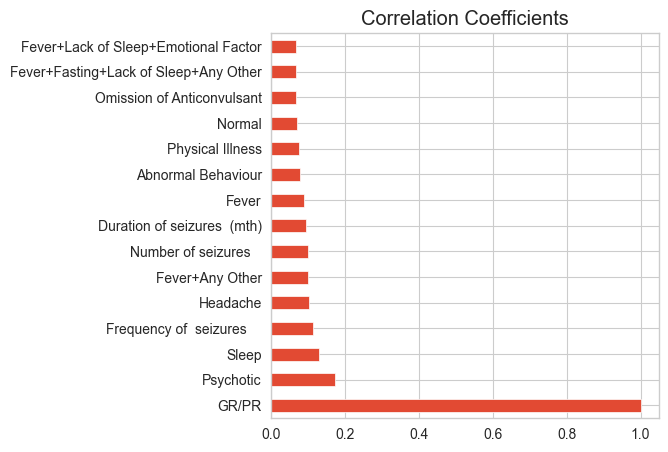

In [226]:
data1=data.drop(['GR/PR'], axis=1)
df_corr_health = data.corr()['GR/PR'].abs().sort_values(ascending=False).head(15)
top_corr_features = df_corr_health.index
# plot top 20 most correlated features to our target (HEALTH)
df_corr_health.plot(kind='barh',title = 'Correlation Coefficients')

# export selected features to .csv

print(df_corr_health)

confussion matrix
[[10 20]
 [ 7 34]]


Accuracy of Logistic Regression: 61.97183098591549 

              precision    recall  f1-score   support

           0       0.59      0.33      0.43        30
           1       0.63      0.83      0.72        41

    accuracy                           0.62        71
   macro avg       0.61      0.58      0.57        71
weighted avg       0.61      0.62      0.59        71

Psychotic                                          1.164189
Fever                                              0.761589
Headache                                           0.644931
Sleep+Others                                       0.640354
Lack of Sleep+Emotional Factor+Physical Illness    0.632936
Physical Illness+Any Other                         0.616760
Lack of Sleep                                      0.594239
Confused+Others                                    0.555216
Physical Illness                                   0.552043
Sleep                                    

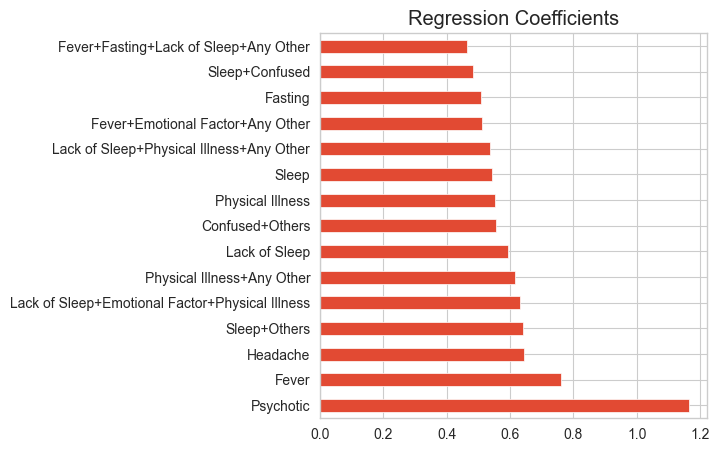

In [225]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
m1cr=classification_report(y_test,lr_predict,output_dict=True)
m10=m1cr.get("weighted avg")
m11=m1cr.get("1")
importance = model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance, index = X_test.columns)

plt=feat_importances.abs().nlargest(15).plot(kind='barh',title = 'Regression Coefficients')
print(feat_importances.abs().nlargest(15))


In [ ]:
data.rename(columns = {'Total Samples (Seizure types)':'seizure_type'}, inplace = True)


data['seizure_type'] = data['seizure_type'].replace(1,0)
data['seizure_type'] = data['seizure_type'].replace(2,1)
data['seizure_type'] = data['seizure_type'].replace(3,2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    data.drop(["seizure_type"], axis=1),
#                                                     df[["Alb (0) (g/dl) (R=3.5-5)"]],
                                                    data['seizure_type'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
len(y_train)

404

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
lr_acc_score=logmodel.score(X_test, y_test)
print(logmodel.score(X_test, y_test))

0.5247524752475248


confussion matrix
[[ 1 15]
 [ 3 37]]


Accuracy of Logistic Regression: 67.85714285714286 

              precision    recall  f1-score   support

           0       0.25      0.06      0.10        16
           1       0.71      0.93      0.80        40

    accuracy                           0.68        56
   macro avg       0.48      0.49      0.45        56
weighted avg       0.58      0.68      0.60        56



<Axes: title={'center': 'Feature Importance'}>

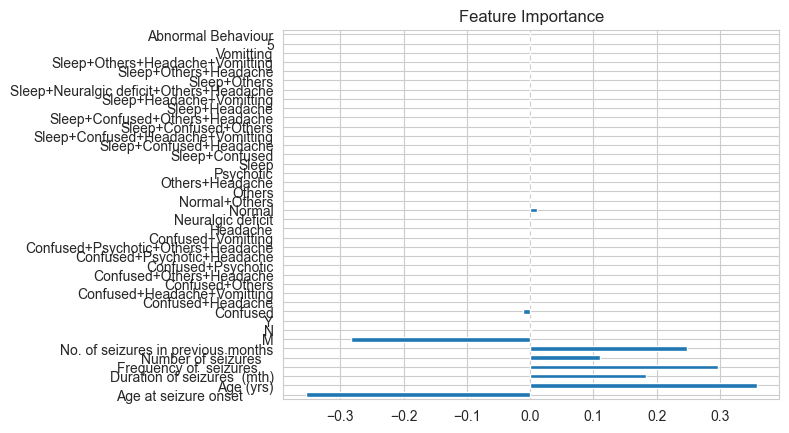

In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression(max_iter=1000)
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
m1cr=classification_report(y_test,lr_predict,output_dict=True)
m10=m1cr.get("weighted avg")
m11=m1cr.get("1")
importance = model.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance, index = X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [ ]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
m2cr=classification_report(y_test,nbpred,output_dict=True)
m20=m2cr.get("weighted avg")
m21=m2cr.get("1")

confussion matrix
[[16  1 18]
 [27  2 33]
 [ 2  0  2]]


Accuracy of Naive Bayes model: 19.801980198019802 

              precision    recall  f1-score   support

           0       0.36      0.46      0.40        35
           1       0.67      0.03      0.06        62
           2       0.04      0.50      0.07         4

    accuracy                           0.20       101
   macro avg       0.35      0.33      0.18       101
weighted avg       0.53      0.20      0.18       101



In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
m3cr=classification_report(y_test,rf_predicted,output_dict=True)
m30=m3cr.get("weighted avg")
m31=m3cr.get("1")

confussion matrix
[[ 4 31  0]
 [ 8 54  0]
 [ 1  3  0]]


Accuracy of Random Forest: 57.42574257425742 

              precision    recall  f1-score   support

           0       0.31      0.11      0.17        35
           1       0.61      0.87      0.72        62
           2       0.00      0.00      0.00         4

    accuracy                           0.57       101
   macro avg       0.31      0.33      0.30       101
weighted avg       0.48      0.57      0.50       101



c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

confussion matrix
[[11 23  1]
 [19 43  0]
 [ 1  3  0]]


Accuracy of Extreme Gradient Boost: 53.46534653465347 

              precision    recall  f1-score   support

           0       0.35      0.31      0.33        35
           1       0.62      0.69      0.66        62
           2       0.00      0.00      0.00         4

    accuracy                           0.53       101
   macro avg       0.33      0.34      0.33       101
weighted avg       0.51      0.53      0.52       101

Feature: 0, Score: 0.01688
Feature: 1, Score: 0.01867
Feature: 2, Score: 0.01890
Feature: 3, Score: 0.01527
Feature: 4, Score: 0.01929
Feature: 5, Score: 0.02422
Feature: 6, Score: 0.01949
Feature: 7, Score: 0.01610
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.03168
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.04267
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18,

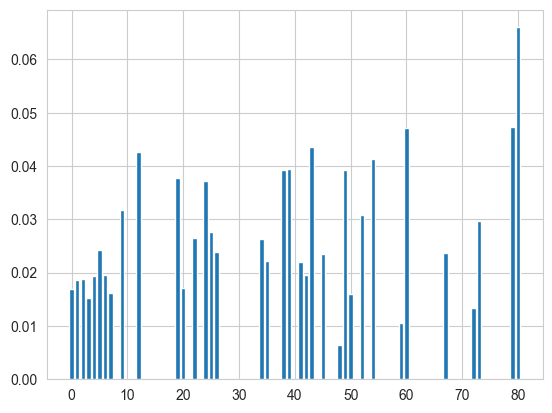

In [ ]:
m4 = 'Extreme Gradient Boost'

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))
m4cr=classification_report(y_test,xgb_predicted,output_dict=True)
m40=m4cr.get("weighted avg")
m41=m4cr.get("1")
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
m5cr=classification_report(y_test,knn_predicted,output_dict=True)
m50=m5cr.get("weighted avg")
m51=m5cr.get("1")


confussion matrix
[[12 22  1]
 [22 39  1]
 [ 1  3  0]]


Accuracy of K-NeighborsClassifier: 50.495049504950494 

              precision    recall  f1-score   support

           0       0.34      0.34      0.34        35
           1       0.61      0.63      0.62        62
           2       0.00      0.00      0.00         4

    accuracy                           0.50       101
   macro avg       0.32      0.32      0.32       101
weighted avg       0.49      0.50      0.50       101



In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=4,max_depth = 100)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
m6cr=classification_report(y_test,dt_predicted,output_dict=True)
m60=m6cr.get("weighted avg")
m61=m6cr.get("1")


confussion matrix
[[15 19  1]
 [24 37  1]
 [ 1  3  0]]


Accuracy of DecisionTreeClassifier: 51.48514851485149 



In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(C=8)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
m7cr=classification_report(y_test,svc_predicted,output_dict=True)
m70=m7cr.get("weighted avg")
m71=m7cr.get("1")

confussion matrix
[[ 9 26  0]
 [14 48  0]
 [ 0  4  0]]


Accuracy of Support Vector Classifier: 56.43564356435643 

              precision    recall  f1-score   support

           0       0.39      0.26      0.31        35
           1       0.62      0.77      0.69        62
           2       0.00      0.00      0.00         4

    accuracy                           0.56       101
   macro avg       0.34      0.34      0.33       101
weighted avg       0.51      0.56      0.53       101



c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91759\Documents\GitHub\EpilepsyResearch\models\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

ValueError: multiclass format is not supported

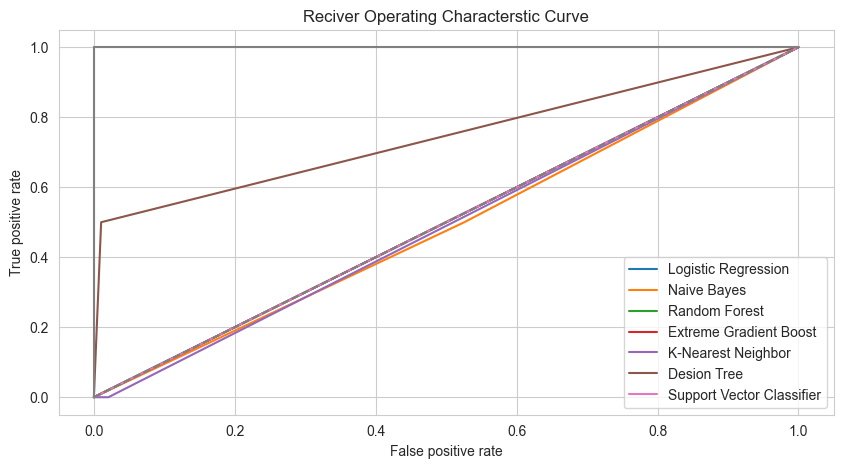

In [ ]:

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100],
                    'Precision0':[m10.get('precision'),m20.get('precision'),m30.get('precision'),m40.get('precision'),m50.get('precision'),m60.get('precision'),m70.get('precision')],
                    'Recall0':[m10.get('recall'),m20.get('recall'),m30.get('recall'),m40.get('recall'),m50.get('recall'),m60.get('recall'),m70.get('recall')],
                    'f1-score0':[m10.get('f1-score'),m20.get('f1-score'),m30.get('f1-score'),m40.get('f1-score'),m50.get('f1-score'),m60.get('f1-score'),m70.get('f1-score')]})
model_ev

,Model,Accuracy,Precision0,Recall0,f1-score0
0,Logistic Regression,52.475248,0.461328,0.524752,0.485611
1,Naive Bayes,19.801980,0.533948,0.198020,0.179169
2,Random Forest,57.425743,0.483314,0.574257,0.499736
3,Extreme Gradient Boost,53.465347,0.505515,0.534653,0.518505
4,K-Nearest Neighbour,50.495050,0.492884,0.504950,0.498821
5,Decision Tree,51.485149,0.514914,0.514851,0.514033
6,Support Vector Machine,56.435644,0.513361,0.564356,0.528479


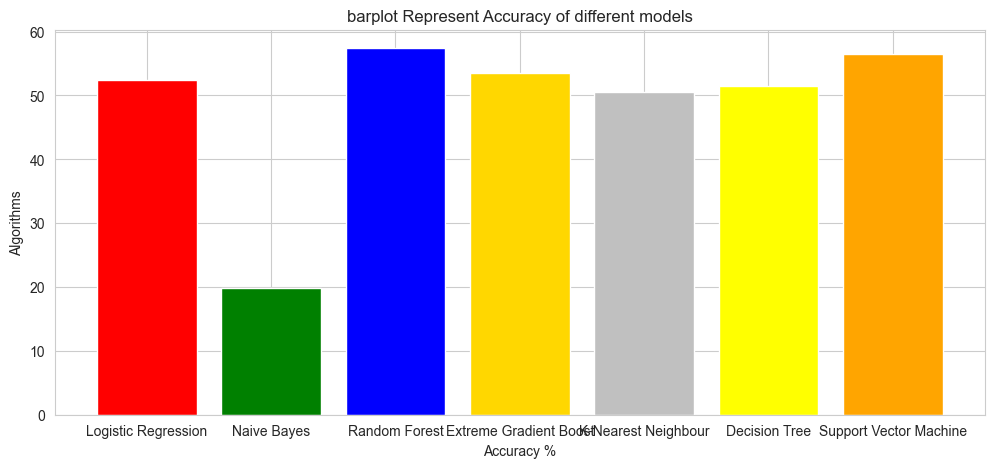

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [ ]:
from scipy import stats
data1=data.iloc[:, :41]
data1=data1[(np.abs(stats.zscore(data1)) < 3).all(axis=1)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    data1.drop(["seizure_type"], axis=1),
#                                                     df[["Alb (0) (g/dl) (R=3.5-5)"]],
                                                    data1['seizure_type'], test_size=0.20, 
                                                    random_state=101)
len(data1)

277

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
importance = logmodel.coef_

importance=importance[0]
c=0.0
for i,v in enumerate(importance):
  
  print('Feature: %0d, Score: %f' % (i,v))
  c=c+v
# plot feature importance
print(c)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

<Axes: >

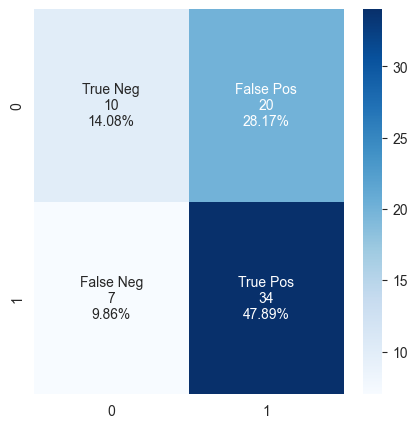

In [148]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')



In [135]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
m2cr=classification_report(y_test,nbpred,output_dict=True)
m20=m2cr.get("weighted avg")
m21=m2cr.get("1")



confussion matrix
[[28  2]
 [37  4]]


Accuracy of Naive Bayes model: 45.07042253521127 

              precision    recall  f1-score   support

           0       0.43      0.93      0.59        30
           1       0.67      0.10      0.17        41

    accuracy                           0.45        71
   macro avg       0.55      0.52      0.38        71
weighted avg       0.57      0.45      0.35        71



confussion matrix
[[ 9 21]
 [ 3 38]]


Accuracy of Random Forest: 66.19718309859155 

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        30
           1       0.64      0.93      0.76        41

    accuracy                           0.66        71
   macro avg       0.70      0.61      0.59        71
weighted avg       0.69      0.66      0.62        71



<Axes: title={'center': 'Feature Importance'}>

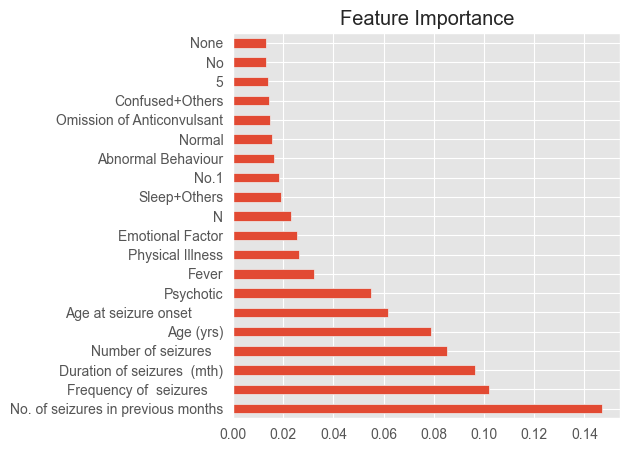

In [136]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
m3cr=classification_report(y_test,rf_predicted,output_dict=True)
m30=m3cr.get("weighted avg")
m31=m3cr.get("1")
plt.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(rf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

confussion matrix
[[17 13]
 [ 8 33]]


Accuracy of Extreme Gradient Boost: 70.4225352112676 

              precision    recall  f1-score   support

           0       0.68      0.57      0.62        30
           1       0.72      0.80      0.76        41

    accuracy                           0.70        71
   macro avg       0.70      0.69      0.69        71
weighted avg       0.70      0.70      0.70        71



<Axes: title={'center': 'Feature Importance'}>

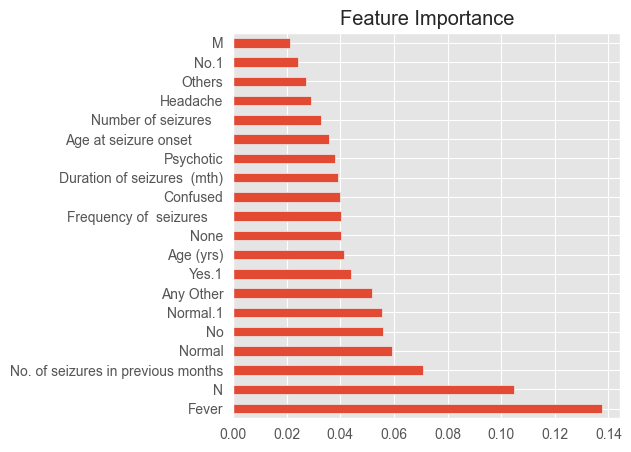

In [137]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))
m4cr=classification_report(y_test,xgb_predicted,output_dict=True)
m40=m4cr.get("weighted avg")
m41=m4cr.get("1")
plt.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(xgb.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [138]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
m5cr=classification_report(y_test,knn_predicted,output_dict=True)
m50=m5cr.get("weighted avg")
m51=m5cr.get("1")


confussion matrix
[[ 6 24]
 [11 30]]


Accuracy of K-NeighborsClassifier: 50.70422535211267 

              precision    recall  f1-score   support

           0       0.35      0.20      0.26        30
           1       0.56      0.73      0.63        41

    accuracy                           0.51        71
   macro avg       0.45      0.47      0.44        71
weighted avg       0.47      0.51      0.47        71



confussion matrix
[[16 14]
 [ 8 33]]


Accuracy of DecisionTreeClassifier: 69.01408450704226 



<Axes: title={'center': 'Feature Importance'}>

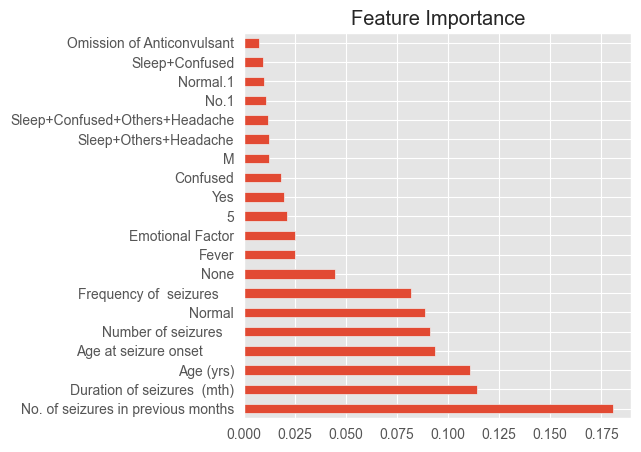

In [139]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=420,max_depth = 100)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
m6cr=classification_report(y_test,dt_predicted,output_dict=True)
m60=m6cr.get("weighted avg")
m61=m6cr.get("1")
plt.rc('figure', figsize=[5,5])
plt.style.use('ggplot')

feat_importances = pd.Series(dt.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot.(kind='barh',title = 'Feature Importance')


In [140]:
m7 = 'Support Vector Classifier'
svc =  SVC(C=7)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))
m7cr=classification_report(y_test,svc_predicted,output_dict=True)
m70=m7cr.get("weighted avg")
m71=m7cr.get("1")
m70


confussion matrix
[[16 14]
 [11 30]]


Accuracy of Support Vector Classifier: 64.7887323943662 

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        30
           1       0.68      0.73      0.71        41

    accuracy                           0.65        71
   macro avg       0.64      0.63      0.63        71
weighted avg       0.64      0.65      0.64        71



{'precision': 0.6441172286242709,
 'recall': 0.647887323943662,
 'f1-score': 0.6448349539964243,
 'support': 71}

In [141]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

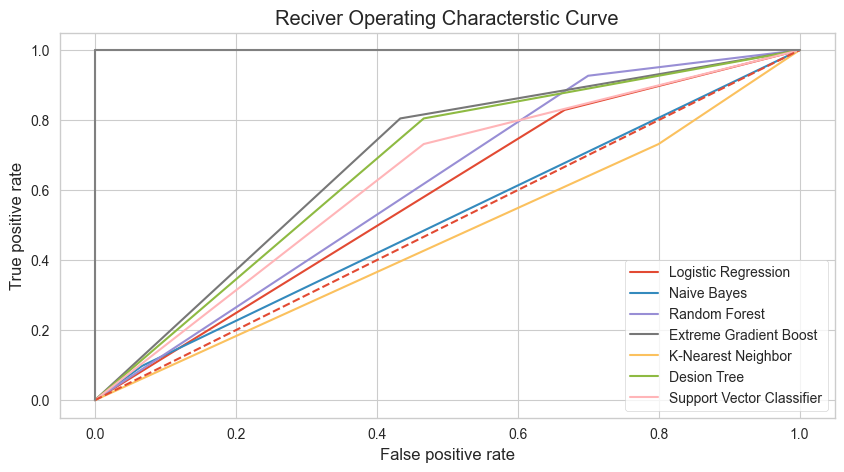

In [142]:

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [143]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100],
                    'Precision0':[m10.get('precision'),m20.get('precision'),m30.get('precision'),m40.get('precision'),m50.get('precision'),m60.get('precision'),m70.get('precision')],
                    'Recall0':[m10.get('recall'),m20.get('recall'),m30.get('recall'),m40.get('recall'),m50.get('recall'),m60.get('recall'),m70.get('recall')],
                    'f1-score0':[m10.get('f1-score'),m20.get('f1-score'),m30.get('f1-score'),m40.get('f1-score'),m50.get('f1-score'),m60.get('f1-score'),m70.get('f1-score')]})
model_ev


,Model,Accuracy,Precision0,Recall0,f1-score0
0,Logistic Regression,61.971831,0.612139,0.619718,0.593145
1,Naive Bayes,45.070423,0.566992,0.450704,0.347365
2,Random Forest,66.197183,0.688828,0.661972,0.619960
3,Extreme Gradient Boost,70.422535,0.701592,0.704225,0.699280
4,K-Nearest Neighbour,50.704225,0.469944,0.507042,0.472596
5,Decision Tree,69.014085,0.687144,0.690141,0.683490
6,Support Vector Machine,64.788732,0.644117,0.647887,0.644835


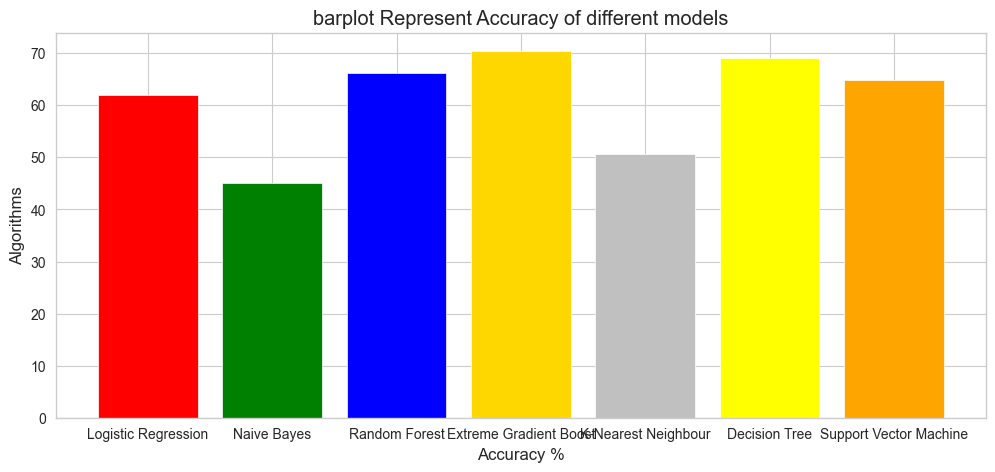

In [144]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)

plt.show()